# NumPy

In [49]:
from numpy import *
from math import *

#--------------------------создайте двумерный массив из 20 целых случайных чисел
arr = array(random.randint(0, 5, size=(2, 10)), 'int32')
print(arr, '\n')


#---------------------------------------разделите полученный массив на 2 массива
first_arr = arr[0]
print(first_arr, '\n')
#еще можно с помощью split:
#split_arrays = np.split(original_array, 2, axis=1)
#но тогда обращаться нужно вот так: split_arrays[0] или [1], не очень удобно

second_arr = arr[1]
print(second_arr, '\n')


#---------------------------------найдите все заданные значения в первом массиве
NUM_FOR_FINDING = 2
found = False
amount = 0
result_arr = array([])

#поиск эл-ов через счетчик и свойство size
for index, i in enumerate(first_arr):
  if NUM_FOR_FINDING == i:
    print(f'Элемент {NUM_FOR_FINDING} найден на позиции {index}')
    amount += 1
    #можно добавить индекс или сам элемент, тут без разницы
    result_arr = append(result_arr, index)
    '''
    наверное, очень плохо с точки зрения оптимизации и памяти,
    т.к. каждый раз пересоздается массив с добавленным элементом
    (а если таких итераций 1_000_000, например?)
    '''
    found = True


#-------------------------------------подсчитайте количество найденных элементов
if not found:
  print(f'Элемент {NUM_FOR_FINDING} не найден')
else:
  print(f'Количество элементов {NUM_FOR_FINDING} (переменная-счетчик) равно {amount}')
  #через массив и св-во size (у списков такого нет, там юзаем len()
  print(f'Количество элементов {NUM_FOR_FINDING} (size) равно {result_arr.size}\n')


'''
в numpy есть прикольные штуки, похожие на linq в C#
решение по поиску элемента с их использованием ниже
'''
indexes = where(first_arr == NUM_FOR_FINDING)
#можно через len(), но нам нужно использовать numpy по условию:
count = count_nonzero(first_arr == NUM_FOR_FINDING)
print(f"Индексы элементов {NUM_FOR_FINDING}: {indexes[0]}") #вернет кортеж с индексами
print(f'Количество элементов {NUM_FOR_FINDING} равно {count}\n')

[[3 3 0 2 1 1 0 1 4 3]
 [3 1 4 3 3 0 4 1 2 2]] 

[3 3 0 2 1 1 0 1 4 3] 

[3 1 4 3 3 0 4 1 2 2] 

Элемент 2 найден на позиции 3
Количество элементов 2 (переменная-счетчик) равно 1
Количество элементов 2 (size) равно 1

Индексы элементов 2: [3]
Количество элементов 2 равно 1



# Pandas (Series)

In [ ]:
from pandas import *
from numpy import *

#-------------------------------------------------------------------------Series
arr = array(random.randint(0, 10, size=10), int)
my_series = Series(arr, index=['a','b','c','d', 'e', 'f', 'g', 'h', 'i', 'j'])
#по синтаксису можно и так: Series({'a': 5, 'b': 6, 'c': 7, 'd': 8}), базовые ключи 0 1 2 3 остаются, даже если задаем свои

print(my_series, '\n')
print(my_series.values)
print(my_series.index, '\n')

print(f'sum = {my_series[0] + my_series[1]}')
print(f'diff = {my_series[0] - my_series[1]}')
print(f'mult = {my_series[0] * my_series[1]}')
print(f"div = {my_series['a'] / my_series['b']}", '\n')

print(my_series[0:3], '\n')
print(my_series[my_series > 7] * 2)

my_series[['a', 'b', 'f']] = 0
print(my_series.values, '\n')


a    2
b    0
c    5
d    4
e    8
f    7
g    6
h    5
i    3
j    7
dtype: int64 

[2 0 5 4 8 7 6 5 3 7]
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

sum = 2
diff = 2
mult = 0
div = inf 

a    2
b    0
c    5
dtype: int64 

e    16
dtype: int64
[0 0 5 4 8 0 6 5 3 7] 



<ipython-input-14-3a319fc645c7>:13: RuntimeWarning: divide by zero encountered in long_scalars
  print(f"div = {my_series['a'] / my_series['b']}", '\n')


# Pandas (DataFrame)

In [53]:
from pandas import *
from numpy import *

#----------------------------------------------------------------------DataFrame
data_costs = array(random.randint(150, 155, size=[4,3]))
rows_models = array(['AD810E', 'HD250ce', 'C310', 'FDJ-2'])
cols_manufacturers = array(['Yamaha', 'Cort', 'Crafter'])

my_df = DataFrame(data_costs, rows_models, cols_manufacturers)
print(my_df)
print(my_df.size)

#нужно указывать ось (axis = 1 - x, 0 - y) и флаг, навсегда удаляем или нет
my_df.drop('Yamaha', axis = 1, inplace = True)
my_df.drop('C310', axis = 0, inplace = True)
print(my_df)
print(my_df.size)

results = my_df[my_df == 152]
print(results)


results = my_df[my_df == 152][['Cort']] #можно вернуть конкр. колонку или несколько
print(results)

         Yamaha  Cort  Crafter
AD810E      154   153      152
HD250ce     152   151      150
C310        153   150      154
FDJ-2       153   153      154
12
         Cort  Crafter
AD810E    153      152
HD250ce   151      150
FDJ-2     153      154
6
         Cort  Crafter
AD810E    NaN    152.0
HD250ce   NaN      NaN
FDJ-2     NaN      NaN
         Cort
AD810E    NaN
HD250ce   NaN
FDJ-2     NaN


# Pandas Part 2

     CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]
Describe:
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income_(k$), 

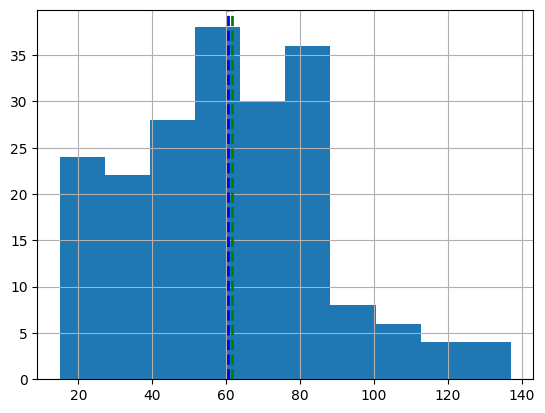

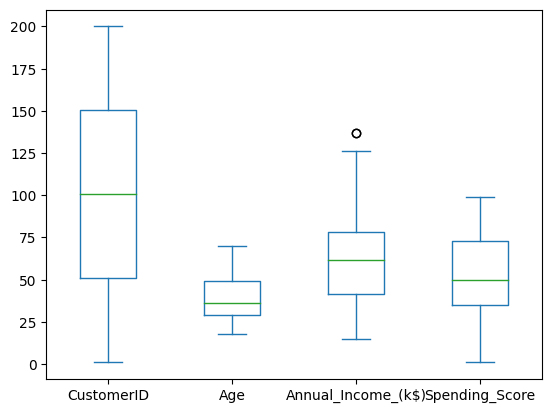

In [ ]:
from pandas import *
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt

customers = read_csv('customers.csv')
print(customers)

customers['Annual_Income_(k$)'].hist() #по доходу покупателей

mean_income = customers['Annual_Income_(k$)'].mean() #avg
median_income = customers['Annual_Income_(k$)'].median() #med

plt.axvline(mean_income, color='b', linestyle='dashed', linewidth=2)
plt.axvline(median_income, color='g', linestyle='dashed', linewidth=2)

customers.plot(kind='box')

print('Describe:')
print(customers['Annual_Income_(k$)'].describe())
#std       26.264721 разброс значений относительно среднего
#25%: - первый квартиль, 25% значений меньше этого числа
#50%: - медиана, среднее значение набора данных
#75%: - третий квартиль, 75% значений меньше этого числа

grouped_mean = customers.groupby('Genre').mean()
grouped_median = customers.groupby('Genre').median()
print("\nСреднее значение:")
print(grouped_mean)
print("\nМедиана:")
print(grouped_median)
